<a href="https://colab.research.google.com/github/oatthegreat/project1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p></p>

# Data Summary

<p>We have a data set of of "Pima Indian Diabetes" it has 8 attributes called Pregnancies	,Glucose	,BloodPressure	,SkinThickness	,Insulin	,BMI	,DiabetesPedigreeFunction	,Age	,Outcome with 768 records where 268 of those are positve results which is 34.9% of the data and 500 of those are negative which is 65.1% of the data. The data is very specific where it only has women that are atleast 21 years of age.</p>

In [688]:
#load all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score, precision_score,f1_score, roc_auc_score, roc_curve
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices, dmatrix, demo_data
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report



#retrieving my data
df = pd.read_csv('https://raw.githubusercontent.com/oatthegreat/project1/main/diabetes.csv')

#create a copy for safety
df_original = df

#printing the data
print('Observations: {}'.format(df.shape[0]))
df.head()

Observations: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [689]:
#desribe my data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [690]:
#length of df
len(df)

768

In [693]:
#replace nana with 0's
df.replace(np.nan, 0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
760,2,88,58,26,16,28.4,0.766,22,0
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [694]:
#check to see if there is still nulls
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [695]:
#replace our 0's
df['Pregnancies'].fillna(df['Pregnancies'].mean(),inplace=True)
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['Outcome'].fillna(df['Outcome'].mean(),inplace=True)

# EDA

<h1>Attributes</h1>
<ol>

  <li>Pregnancies is how many times someone got pregnant</li>

  <li>Glucose is the levels of plasma glucose concentration withing a 2 hour mark in an oral glucose tolerence test</li>

  <li>BloodPressure is the Diastolic Blood Pressure. The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen</li>

  <li>SkinThickness is a value used to estimate body fat, measured on the right arm halfway between the olecranon process of the elbow and the acromial process of the scapula.</li>

  <li>Insulin is the 2 hour Glucose Tolerance. They test with Insulin levels so it is used to assess how an individual processes glucose and the insulin in the body that responds to those glucose levels</li>

  <li>BMI the body mass index is a measure that uses your height and weight to work out if your weight is healthy</li>

  <li>DiabetesPedigreeFunction is when there is a likelihood of diabetes based on family history</li>

  <li>Age is the various age of the women</li>
                                  
</ol>

<p>This is the data shown visually the data is pretty accurate after all the cleaning </p>

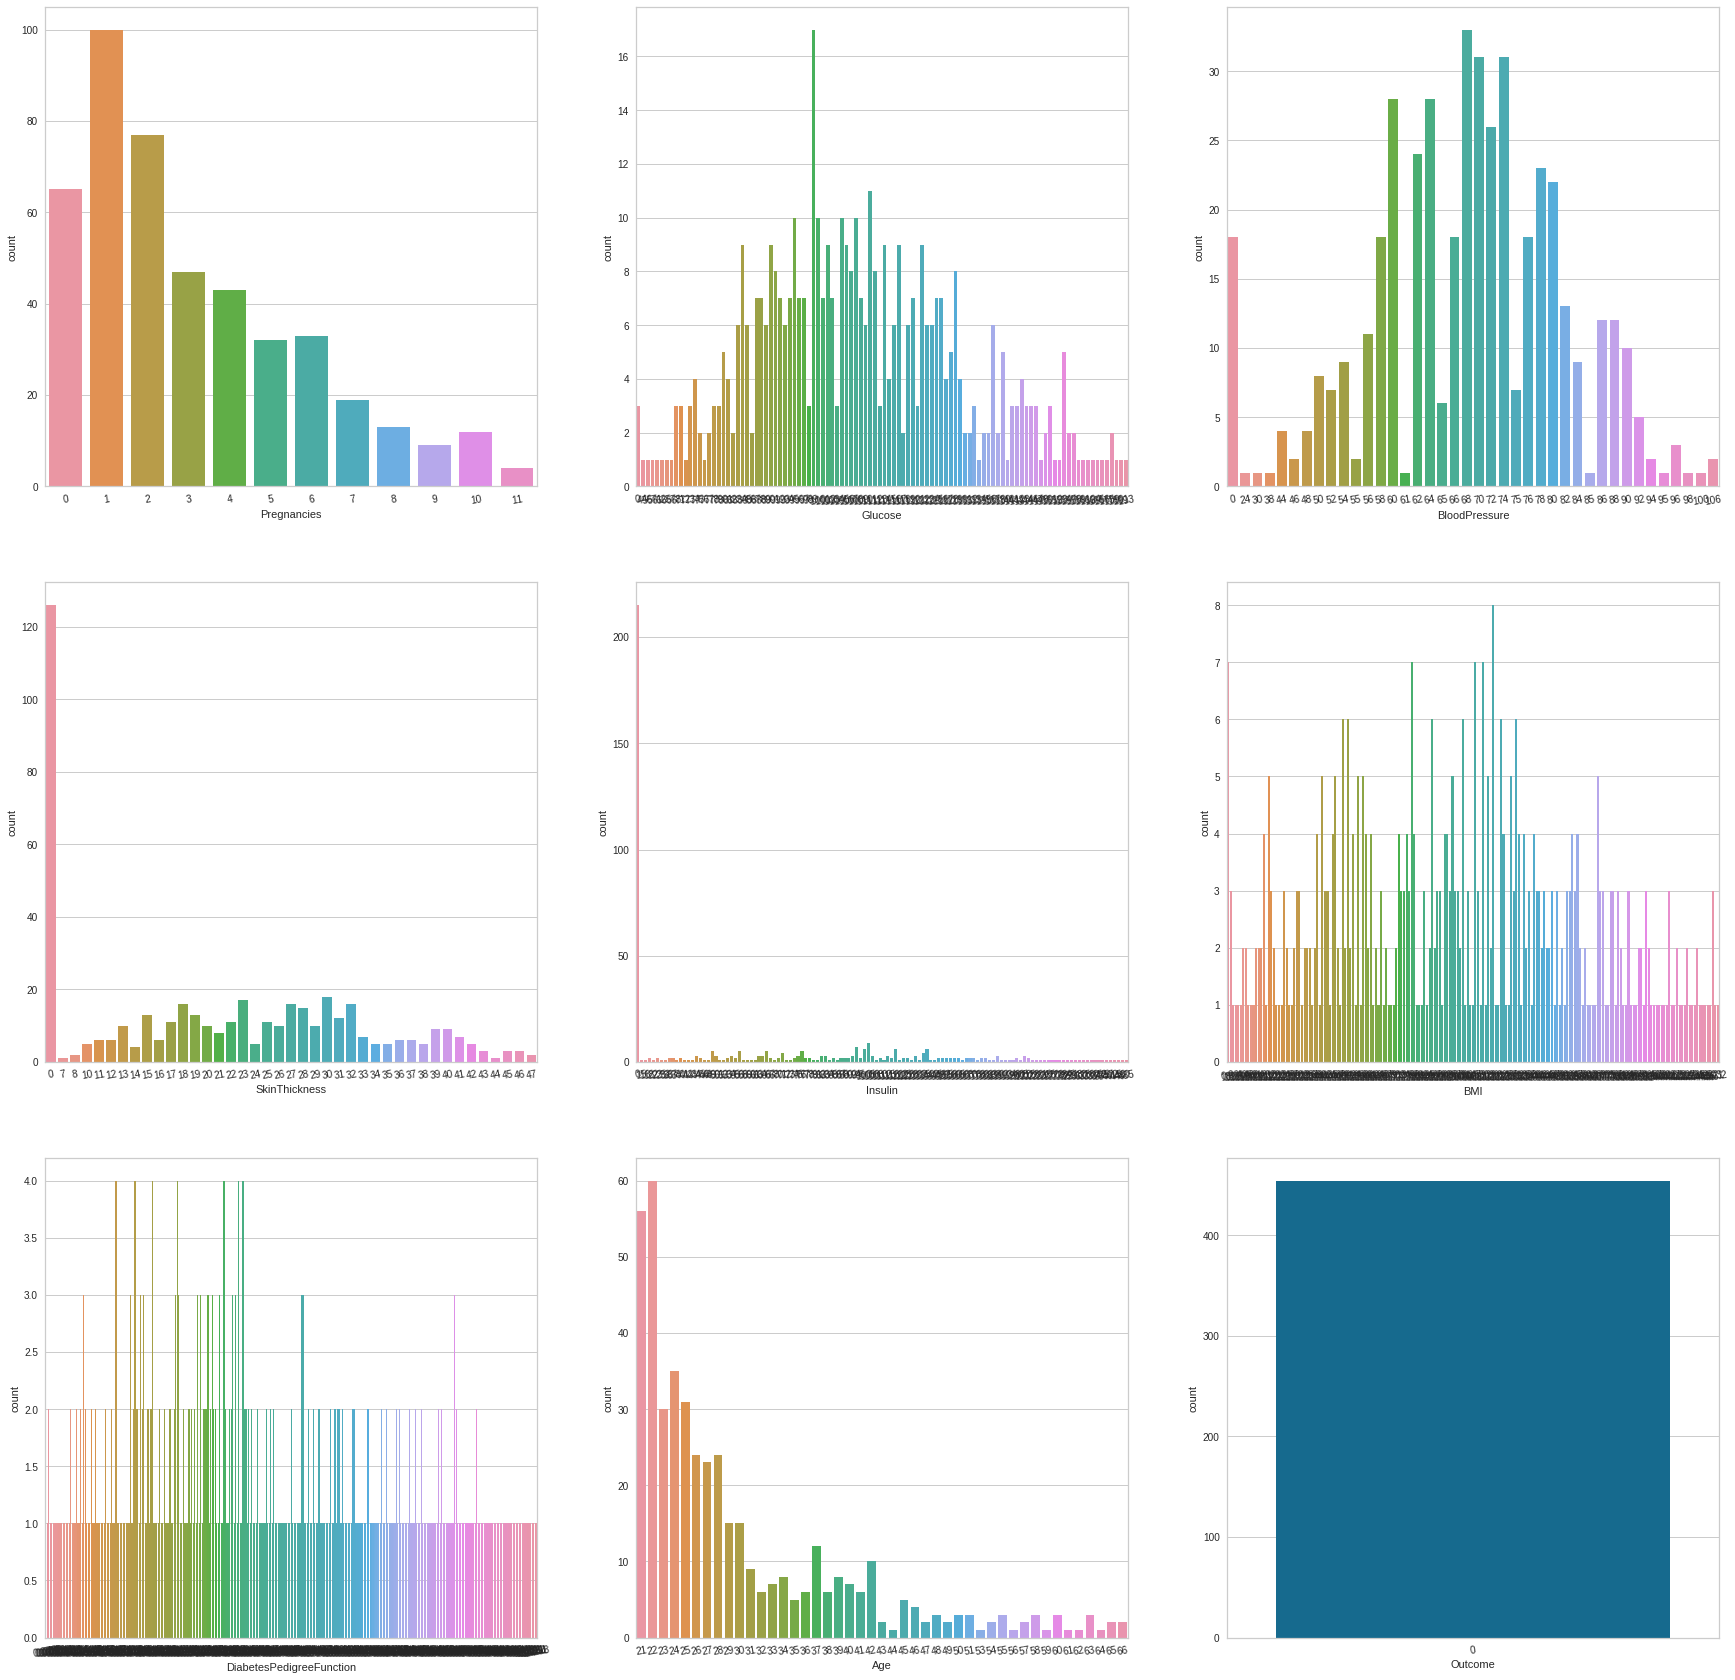

In [697]:
fig,ax = plt.subplots(3, 3, figsize=(30,30))
for variable , subplot in zip (df, ax.flatten()):
  sns.countplot(df[variable], ax=subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(10)

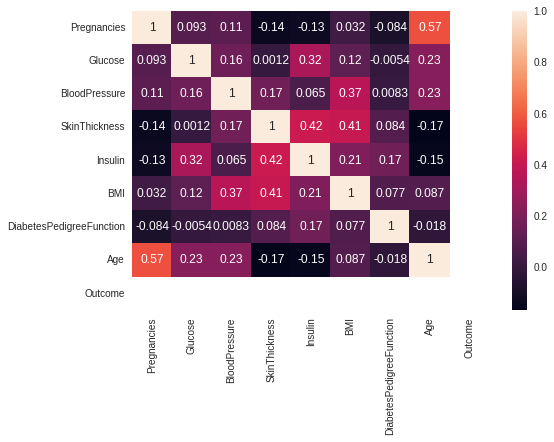

In [698]:
#Correlation Matrix
corr=df.corr()
sns.heatmap(corr,annot=True)


<p>Dropping our outliers</p>

In [699]:
X=df.drop(columns=['Outcome'],axis=1).values
y=df['Outcome'].values
print(X.shape)
print(y.shape)

(454, 8)
(454,)


#  logistic regression

In [700]:
#we put our longestic for our pregnancies 
y, X = dmatrices('Pregnancies ~ Glucose + BloodPressure + SkinThickness + Insulin + C(BMI) + C(DiabetesPedigreeFunction) + C(Age)', df, return_type="dataframe")
y = np.ravel(y)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.27312775330396477

In [701]:
# what percentage had denials?
y.mean()

3.0991189427312777

In [702]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,"[0.0007799916642357777, 0.18812086347643828, 0..."
1,C(BMI)[T.18.2],"[-0.016296224715668196, 0.09761530445187516, -..."
2,C(BMI)[T.18.4],"[0.034181113826088454, -0.0050413299741054, -0..."
3,C(BMI)[T.19.1],"[-0.0046919299473866345, 0.03463365058857225, ..."
4,C(BMI)[T.19.3],"[-0.0059139928134783245, -0.007898775564580901..."
...,...,...
572,C(Age)[T.66],"[-0.010800522033127449, -0.010047561000756842,..."
573,Glucose,"[0.005362197989129668, 0.0024398594217304274, ..."
574,BloodPressure,"[0.0024682335155867536, 0.001706644470186124, ..."
575,SkinThickness,"[0.033901541416082516, 0.042913724187622564, 0..."


<p>...</p>

# evaluation/performance metrics

In [ ]:
#evaluate our age and pregnancies with predict and tests
y_test = df['Age']
y_predict = df['Pregnancies']

pd.crosstab(y_test,y_predict, margins=True, margins_name='Total', dropna=False)

In [ ]:
#then we print our classification
print(classification_report(y_test,y_predict,digits = 2))

# logistic regression Part 2

In [705]:
#we put our longestic for our pregnancies after our evaluation
y, X = dmatrices('Pregnancies ~ Glucose + BloodPressure + SkinThickness + Insulin + C(BMI) + C(DiabetesPedigreeFunction) + C(Age)', df, return_type="dataframe")
y = np.ravel(y)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.27312775330396477

In [706]:
# what percentage had a certain BloodPressure?
y.mean()

3.0991189427312777

In [707]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,"[0.0007799916642357777, 0.18812086347643828, 0..."
1,C(BMI)[T.18.2],"[-0.016296224715668196, 0.09761530445187516, -..."
2,C(BMI)[T.18.4],"[0.034181113826088454, -0.0050413299741054, -0..."
3,C(BMI)[T.19.1],"[-0.0046919299473866345, 0.03463365058857225, ..."
4,C(BMI)[T.19.3],"[-0.0059139928134783245, -0.007898775564580901..."
...,...,...
572,C(Age)[T.66],"[-0.010800522033127449, -0.010047561000756842,..."
573,Glucose,"[0.005362197989129668, 0.0024398594217304274, ..."
574,BloodPressure,"[0.0024682335155867536, 0.001706644470186124, ..."
575,SkinThickness,"[0.033901541416082516, 0.042913724187622564, 0..."


# Data Imbalance

In [726]:
#Using smote to check our data imbalance 
#using the properties output and age



data_final = df
X = data_final.loc[:, data_final.columns != 'Output']
y = data_final.loc[:, data_final.columns == 'Age']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

ValueError: ignored

In [ ]:
#using logestic regression 
data_final_vars=df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
#printing a summary
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
#predicting our x test 
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# Logistic regression part 3

In [ ]:
#we put our longestic for our pregnancies after our data imbalance 
y, X = dmatrices('Pregnancies ~ Glucose + BloodPressure + SkinThickness + Insulin + C(BMI) + C(DiabetesPedigreeFunction) + C(Age)', df, return_type="dataframe")
y = np.ravel(y)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

In [ ]:
# what percentage had a certain BloodPressure?
y.mean()

In [ ]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

# Roc

In [ ]:
#Plotting our roc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# svm

In [ ]:
df.Pregnancies.value_counts()

In [ ]:
df.Age.value_counts()

In [712]:
#do OneHotEncoder for non-binary categorical data
ccs = pd.get_dummies(df['Pregnancies'])
mcs = pd.get_dummies(df['Age'])
ohe_df = df.filter(['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Outcome'], axis = 1)
ohe_df = ohe_df.join(ccs)
ohe_df = ohe_df.join(mcs)
ohe_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,0,1,2,...,57,58,59,60,61,62,63,64,65,66
1,85,66,29,0,26.6,0.351,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,89,66,23,94,28.1,0.167,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,116,74,0,0,25.6,0.201,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,115,0,0,0,35.3,0.134,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,110,92,0,0,37.6,0.191,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#use Gelman strategy for normalization
g_df=(ohe_df-ohe_df.mean())/(2*ohe_df.std())

theDir = (ohe_df['Glucose'] - ohe_df['Glucose'].mean())/ohe_df['Glucose'].std()
theHir = (ohe_df['BloodPressure'] - ohe_df['BloodPressure'].mean())/ohe_df['BloodPressure'].std()
theLvr = (ohe_df['SkinThickness'] - ohe_df['SkinThickness'].mean())/ohe_df['SkinThickness'].std()
theUer = (ohe_df['Insulin'] - ohe_df['Insulin'].mean())/ohe_df['Insulin'].std()
transformed_data = pd.DataFrame([theDir,theHir,theLvr,theUer]).T
reg_df = ohe_df.drop(['Glucose','BloodPressure','SkinThickness','Insulin'], axis =1 )
reg_df = reg_df.join(transformed_data)
reg_df.head()

# Summary